In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
df = pd.read_csv("../server/data/mod_data_Q1234_20_21_22.csv")
df.head()

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,...,smart_171_raw,smart_172_normalized,smart_172_raw,smart_230_normalized,smart_230_raw,smart_244_normalized,smart_244_raw,smart_246_normalized,smart_246_raw,MFG
0,4925,2020-01-01,ZA153S5V,ST8000NM0055,8001563222016,1,68.0,6541192.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seagate
1,35633,2020-01-01,Z304JPPZ,ST4000DM000,4000787030016,1,117.0,137630232.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seagate
2,43777,2020-01-01,ZA12APRK,ST8000DM002,8001563222016,1,83.0,204900216.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seagate
3,84052,2020-01-01,96BDP79RT,TOSHIBA MQ01ABF050,500107862016,1,100.0,0.0,100.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TOSHIBA
4,113096,2020-01-01,ZA180QFP,ST8000NM0055,8001563222016,1,82.0,149337112.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seagate


In [32]:
# Drop if capacity is -1
df.fillna(0)
df = df[(df["capacity_bytes"] > 0) &  (df["smart_9_raw"] > 0)]
df["capacity_TB"] = df["capacity_bytes"] //1000//1000//1000/1000

# Count by mfg and capacity

In [33]:
res =  [True for i in range(len(df.columns))]
for i,col in enumerate(df.columns):
    if "normalized" in col:
        res[i] = False
df = df.iloc[:,res]
df.describe()

,Unnamed: 0,capacity_bytes,failure,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,...,smart_167_raw,smart_169_raw,smart_176_raw,smart_178_raw,smart_171_raw,smart_172_raw,smart_230_raw,smart_244_raw,smart_246_raw,capacity_TB
count,241850.000000,2.418500e+05,241850.000000,2.418500e+05,241850.000000,241850.000000,241850.000000,241850.000000,2.418500e+05,241850.000000,...,239489.000000,239489.000000,239489.0,239489.000000,238921.000000,238921.000000,2.389210e+05,238921.0,2.389210e+05,241850.000000
mean,116881.064023,1.142990e+13,0.027538,5.866815e+07,24.194116,1819.518673,12.539285,130.582655,2.313606e+09,5.849369,...,0.103182,0.079014,0.0,0.003862,0.000008,0.000167,5.236445e+09,0.0,8.650593e+07,11.429366
std,67861.661606,4.248147e+12,0.163644,7.824778e+07,44.161271,3196.733180,132.852813,2030.395561,5.836499e+11,11.705130,...,6.763473,2.796329,0.0,0.213862,0.004092,0.040090,4.009102e+11,0.0,2.354339e+09,4.248128
min,0.000000,2.400574e+11,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.240000
25%,58112.250000,8.001563e+12,0.000000,0.000000e+00,0.000000,0.000000,4.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,8.001000
50%,116555.500000,1.200014e+13,0.000000,0.000000e+00,0.000000,0.000000,7.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,12.000000
75%,175311.750000,1.400052e+13,0.000000,1.173154e+08,0.000000,546.000000,14.000000,0.000000,5.957018e+08,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,14.000000
max,235607.000000,1.800021e+13,1.000000,1.393973e+09,5618.000000,11065.000000,30087.000000,65528.000000,2.814711e+14,126.000000,...,1408.000000,178.000000,0.0,17.000000,2.000000,12.000000,1.114123e+14,0.0,4.034276e+11,18.000000


In [34]:
df_MFG_cap = df[df['failure'] == 1].groupby(['MFG','capacity_bytes'])

In [35]:
df_MFG_cap.describe()
#ax = df_MFG_cap.plot.bar(x='MFG', y='count',rot=1)
# df_MFG_cap["capacity_bytes"].plot.bar(x='MFG', y='count')
df_MFG_cap["capacity_bytes"].count()


MFG      capacity_bytes
HGST     4000787030016      194
         8001563222016       30
         12000138625024     307
HP       250059350016       108
Hitachi  4000787030016        1
Micron   240057409536         9
         250059350016         4
Seagate  250059350016        34
         500107862016       134
         2000398934016        1
         4000787030016     1232
         6001175126016        9
         8001563222016     1135
         10000831348736      88
         12000138625024    1483
         14000519643136     379
         16000900661248     178
         18000207937536       6
TOSHIBA  500107862016       361
         4000787030016        5
         8001563222016        2
         14000519643136     731
         16000900661248     147
WDC      250059350016         1
         500107862016        19
         14000519643136      45
         16000900661248      17
Name: capacity_bytes, dtype: int64

In [36]:
#table = df.pivot_table( values = 'failure', index = ['MFG', 'capacity_TB'],aggfunc=len)
table = df.pivot_table( values = 'failure', index = ['MFG', 'capacity_TB'],aggfunc=len)
table

failure
MFG     capacity_TB         
HGST    4.000          16716
        8.001           1261
        10.000            20
        12.000         26847
HP      0.250            108
Hitachi 4.000              7
Micron  0.240             98
        0.250            492
Seagate 0.250           1834
        0.500            804
        1.000              1
        2.000              4
        4.000          19533
        6.001            900
        8.001          25176
        10.000          1290
        12.000         35198
        14.000         12686
        16.000         20905
        18.000            66
TOSHIBA 0.500            855
        4.000             99
        6.001              4
        8.001             22
        14.000         39464
        16.000         15120
WDC     0.250             93
        0.500            270
        6.001              3
        14.000          8455
        16.000         13519

In [37]:
table = df[df["capacity_TB"] >= 2].pivot_table( values = 'failure', index = ['MFG', 'capacity_TB'],aggfunc=np.mean)
table

failure
MFG     capacity_TB          
HGST    4.000        0.011606
        8.001        0.023791
        10.000       0.000000
        12.000       0.011435
Hitachi 4.000        0.142857
Seagate 2.000        0.250000
        4.000        0.063073
        6.001        0.010000
        8.001        0.045083
        10.000       0.068217
        12.000       0.042133
        14.000       0.029875
        16.000       0.008515
        18.000       0.090909
TOSHIBA 4.000        0.050505
        6.001        0.000000
        8.001        0.090909
        14.000       0.018523
        16.000       0.009722
WDC     6.001        0.000000
        14.000       0.005322
        16.000       0.001257

In [38]:
table.to_dict()

{'failure': {('HGST', 4.0): 0.011605647284039244,
  ('HGST', 8.001): 0.023790642347343377,
  ('HGST', 10.0): 0.0,
  ('HGST', 12.0): 0.011435169665139494,
  ('Hitachi', 4.0): 0.14285714285714285,
  ('Seagate', 2.0): 0.25,
  ('Seagate', 4.0): 0.06307274868171812,
  ('Seagate', 6.001): 0.01,
  ('Seagate', 8.001): 0.04508261836669844,
  ('Seagate', 10.0): 0.06821705426356589,
  ('Seagate', 12.0): 0.04213307574293994,
  ('Seagate', 14.0): 0.029875453255557308,
  ('Seagate', 16.0): 0.008514709399665152,
  ('Seagate', 18.0): 0.09090909090909091,
  ('TOSHIBA', 4.0): 0.050505050505050504,
  ('TOSHIBA', 6.001): 0.0,
  ('TOSHIBA', 8.001): 0.09090909090909091,
  ('TOSHIBA', 14.0): 0.018523211027772147,
  ('TOSHIBA', 16.0): 0.009722222222222222,
  ('WDC', 6.001): 0.0,
  ('WDC', 14.0): 0.005322294500295683,
  ('WDC', 16.0): 0.0012574894592795325}}

In [39]:
df["power_on_years"] = df["smart_9_raw"] / 24 / 365
df["power_on_years"]

0         2.544863
1         4.238014
2         3.255137
3         2.863356
4         2.396461
            ...   
242329    0.150228
242330    0.150799
242331    0.150342
242332    0.151027
242333    0.149315
Name: power_on_years, Length: 241850, dtype: float64

In [40]:
table = df.pivot_table( values = 'power_on_years', index = ['MFG', 'capacity_TB'],aggfunc=np.mean)
table

power_on_years
MFG     capacity_TB                
HGST    4.000              6.204329
        8.001              4.658513
        10.000             4.002374
        12.000             2.702104
HP      0.250              0.159507
Hitachi 4.000              6.534181
Micron  0.240              1.959978
        0.250              0.583857
Seagate 0.250              2.177332
        0.500              4.632258
        1.000              5.788014
        2.000              3.433562
        4.000              7.072853
        6.001              7.684738
        8.001              5.568647
        10.000             4.897217
        12.000             2.486321
        14.000             1.898906
        16.000             1.125555
        18.000             2.074910
TOSHIBA 0.500              4.401069
        4.000              7.568521
        6.001              4.573516
        8.001              4.051017
        14.000             2.150409
        16.000             1.005306
WDC     0.250              0.614156
        0.500              7.276566
        6.001              7.661492
        14.000             2.056482
        16.000             0.553088

In [41]:
table.to_numpy()

array([[6.20432859],
       [4.65851339],
       [4.00237443],
       [2.70210381],
       [0.1595066 ],
       [6.53418134],
       [1.9599781 ],
       [0.58385654],
       [2.17733222],
       [4.63225823],
       [5.7880137 ],
       [3.43356164],
       [7.07285258],
       [7.68473808],
       [5.56864676],
       [4.89721674],
       [2.48632072],
       [1.89890563],
       [1.12555519],
       [2.07491006],
       [4.40106879],
       [7.56852082],
       [4.57351598],
       [4.05101702],
       [2.15040873],
       [1.00530623],
       [0.61415648],
       [7.27656562],
       [7.66149163],
       [2.05648247],
       [0.55308768]])

In [42]:
table['cluster'] = table.index

In [43]:
table.index

MultiIndex([(   'HGST',   4.0),
            (   'HGST', 8.001),
            (   'HGST',  10.0),
            (   'HGST',  12.0),
            (     'HP',  0.25),
            ('Hitachi',   4.0),
            ( 'Micron',  0.24),
            ( 'Micron',  0.25),
            ('Seagate',  0.25),
            ('Seagate',   0.5),
            ('Seagate',   1.0),
            ('Seagate',   2.0),
            ('Seagate',   4.0),
            ('Seagate', 6.001),
            ('Seagate', 8.001),
            ('Seagate',  10.0),
            ('Seagate',  12.0),
            ('Seagate',  14.0),
            ('Seagate',  16.0),
            ('Seagate',  18.0),
            ('TOSHIBA',   0.5),
            ('TOSHIBA',   4.0),
            ('TOSHIBA', 6.001),
            ('TOSHIBA', 8.001),
            ('TOSHIBA',  14.0),
            ('TOSHIBA',  16.0),
            (    'WDC',  0.25),
            (    'WDC',   0.5),
            (    'WDC', 6.001),
            (    'WDC',  14.0),
            (    'WDC',  16.0)],
       

# Simulate HDD Data

In [44]:
df_grp = df.groupby(['MFG','capacity_bytes'])

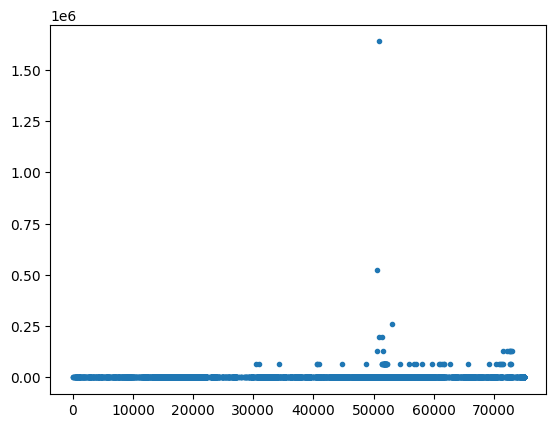

In [52]:
hours = df[df['MFG']=="HGST"]['smart_9_raw']
data = df[df['MFG']=="HGST"]['smart_10_raw']
plt.plot(hours,data,'.')